In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'datasets\master.csv')

In [3]:
df = pd.DataFrame(df)

In [4]:
country_gr = df.groupby('country').sum()

<AxesSubplot:xlabel='suicides/100k pop', ylabel='country'>

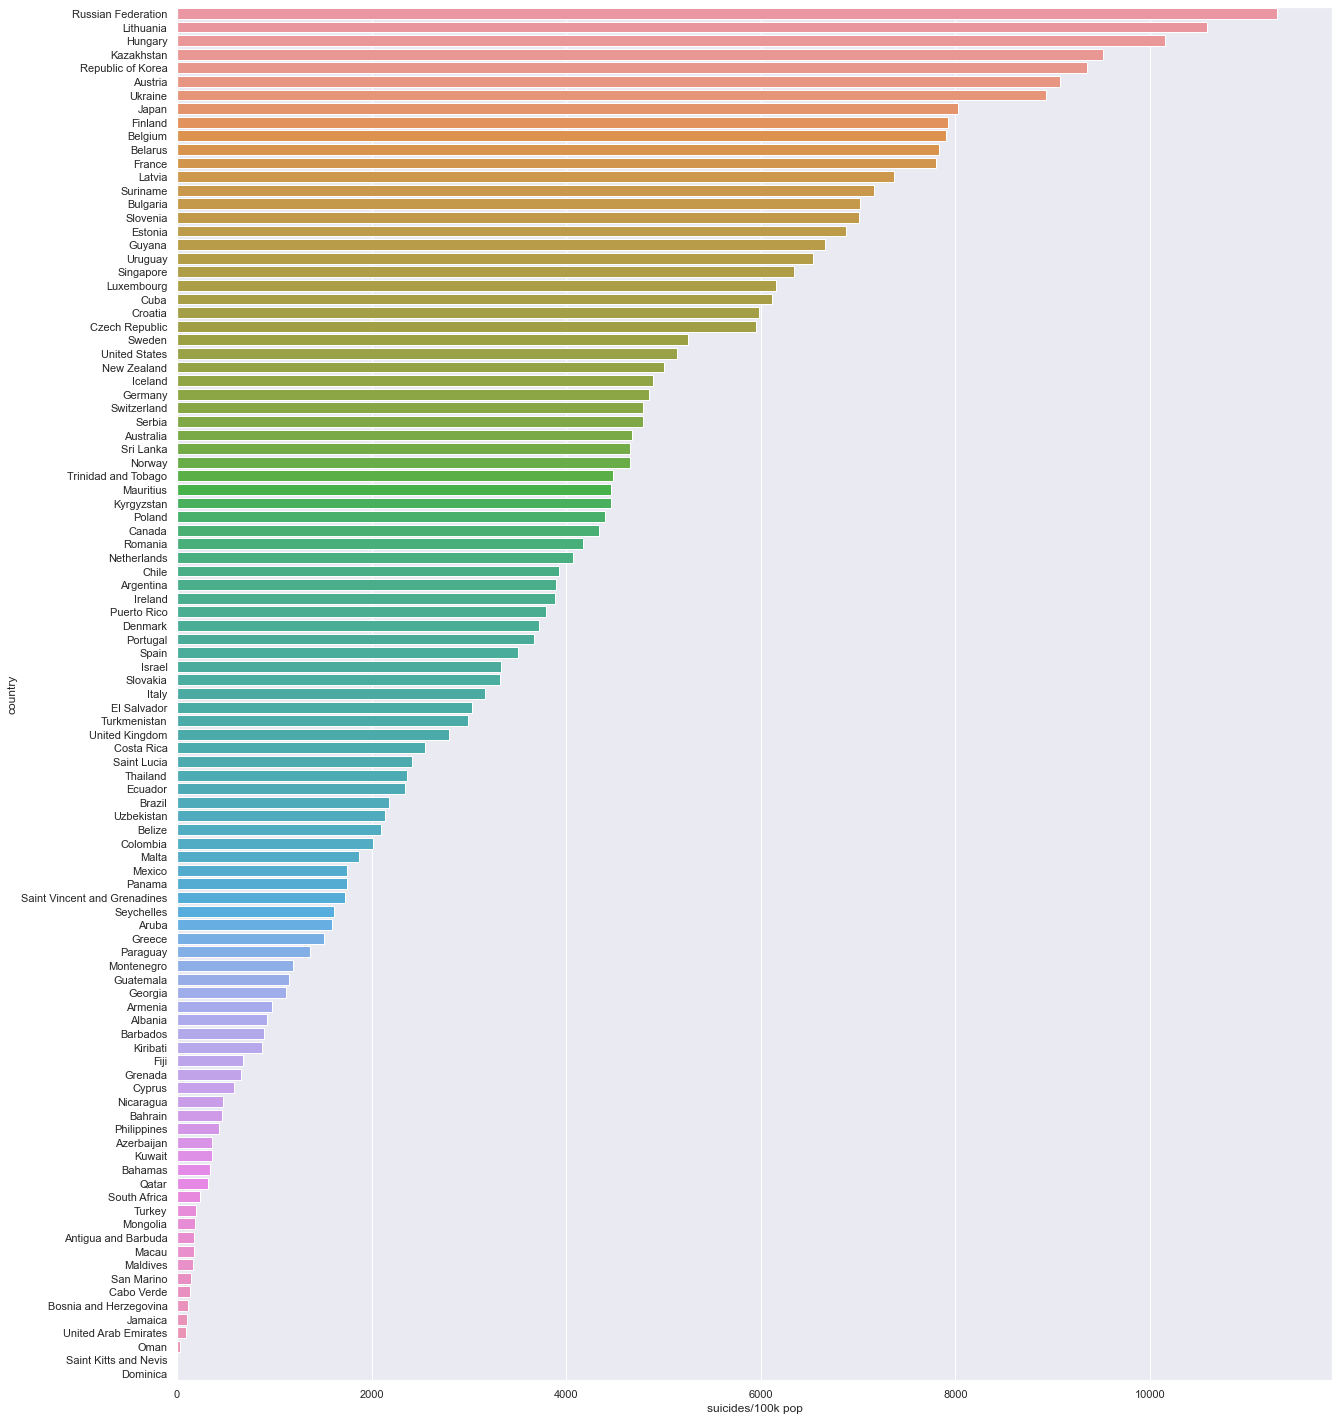

In [5]:
country_gr = country_gr.sort_values('suicides/100k pop', ascending = False)
sns.set(rc={'figure.figsize':(20.7,25.27)})
sns.barplot(data = country_gr, x = 'suicides/100k pop', y = country_gr.index)

In [6]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
df.groupby('sex').rolling(10).mean().dropna()

year  suicides_no  population  suicides/100k pop  \
sex                                                                
female 555    2012.4          0.0      8586.1       1.443290e-16   
       556    2012.5          0.0      8321.3       1.443290e-16   
       557    2012.6          0.0      7765.0       1.443290e-16   
       564    2012.8          0.0      7099.4       1.443290e-16   
       565    2013.0          0.0      7017.1       1.443290e-16   
...              ...          ...         ...                ...   
male   27809  2013.0        224.1   2238251.5       9.115000e+00   
       27811  2013.2        237.0   2343991.3       9.546000e+00   
       27812  2013.4        265.0   2386545.7       1.040800e+01   
       27813  2013.5        218.6   2074404.1       9.727000e+00   
       27817  2013.6        191.8   2086155.1       8.704000e+00   

              HDI for year  gdp_per_capita ($)  
sex                                             
female 555          0.7810             13509.0  
       556          0.7810             13472.0  
       557          0.7810             13435.0  
       564          0.7812             13478.6  
       565          0.7814             13522.2  
...                    ...                 ...  
male   27809        0.6718              2144.6  
       27811        0.6725              2179.1  
       27812        0.6732              2213.6  
       27813        0.6735              2229.5  
       27817        0.6738              2245.4  

[3384 rows x 6 columns]

In [8]:
male_death = df.groupby('sex').rolling(10).mean().dropna().loc['male']

In [9]:
female_death = df.groupby('sex').rolling(10).mean().dropna().loc['female']

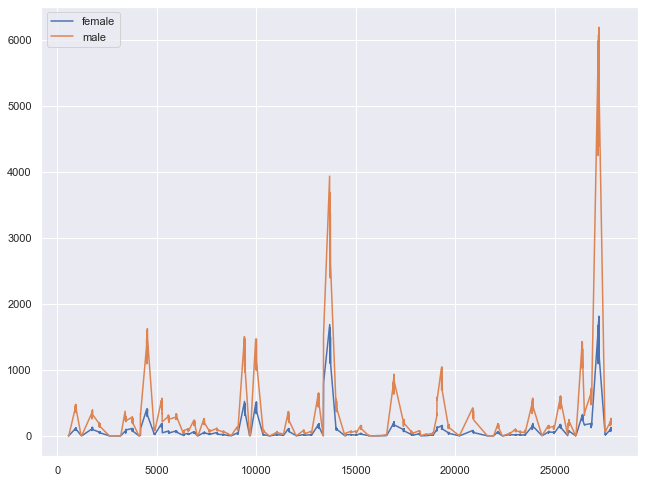

In [10]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
plt.plot(female_death['suicides_no'])
plt.plot(male_death['suicides_no'])
plt.legend(['female', 'male'])

In [11]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [12]:
age_death = df.groupby('age').sum().reset_index()
five_14 = pd.DataFrame(age_death.iloc[3]).transpose()
age_death = pd.concat([five_14, age_death]).reset_index()
age_death.drop(index = 4)

,index,age,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,3,5-14 years,9225408,52264,8398693237,2858.39,1082.58,77519770
1,0,15-24 years,9289920,808542,8642946896,41532.7,1082.58,78341054
2,1,25-34 years,9289920,1123912,8438103587,56571.5,1082.58,78341054
3,2,35-54 years,9289920,2452141,14375888123,69386,1082.58,78341054
5,4,55-74 years,9289920,1658443,8803245340,74994.2,1082.58,78341054
6,5,75+ years,9289920,653118,2663281253,111201,1082.58,78341054


<AxesSubplot:xlabel='age', ylabel='suicides_no'>

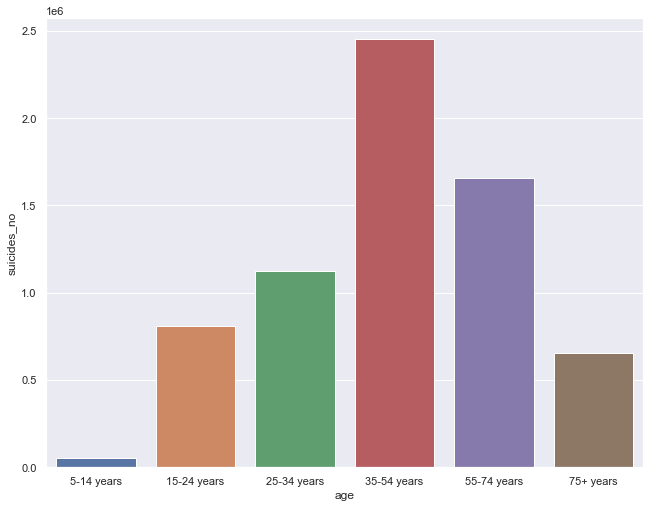

In [13]:
sns.barplot(data = age_death, y = 'suicides_no', x = 'age')

In [14]:
male_df = df[df['sex'] == 'male']

In [15]:
female_df = df[df['sex'] == 'female']

In [16]:
male_df = male_df.groupby('year').sum()

In [17]:
female_df = female_df.groupby('year').sum()

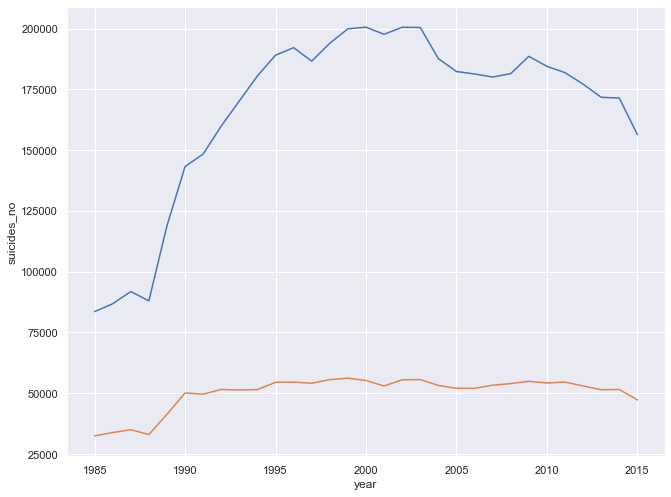

In [18]:
sns.lineplot(data = male_df.drop(index = 2016), y = 'suicides_no', x = male_df.index[:-1])
sns.lineplot(data = female_df.drop(index = 2016), y = 'suicides_no', x = female_df.index[:-1])
plt.show()

In [28]:
country_mean = df.groupby('country').mean()
country_mean

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,,,,,,
Albania,1999.227273,7.462121,2.360813e+05,3.502879,0.673000,1859.045455
Antigua and Barbuda,1999.481481,0.033951,6.142679e+03,0.552901,0.781667,10448.185185
Argentina,2000.000000,221.018817,2.784907e+06,10.469328,0.779600,7914.096774
Armenia,2002.791946,6.392617,2.595576e+05,3.275872,0.690125,1873.919463
Aruba,2004.285714,0.601190,7.498077e+03,9.503095,NaN,24221.642857
...,...,...,...,...,...,...
United Arab Emirates,2007.500000,8.638889,5.069760e+05,1.317917,0.825000,42162.000000
United Kingdom,2000.000000,367.755376,4.674107e+06,7.502473,0.863500,31908.354839
United States,2000.000000,2779.604839,2.165061e+07,13.819812,0.891600,39269.612903


In [29]:
total_suicides = df.groupby('country').sum()['suicides/100k pop']

In [31]:
country_mean.drop('suicides/100k pop', axis = 1, inplace = True)
country_mean = pd.concat([country_mean, total_suicides], axis = 1)

In [32]:
country_mean

,year,suicides_no,population,HDI for year,gdp_per_capita ($),suicides/100k pop
country,,,,,,
Albania,1999.227273,7.462121,2.360813e+05,0.673000,1859.045455,924.76
Antigua and Barbuda,1999.481481,0.033951,6.142679e+03,0.781667,10448.185185,179.14
Argentina,2000.000000,221.018817,2.784907e+06,0.779600,7914.096774,3894.59
Armenia,2002.791946,6.392617,2.595576e+05,0.690125,1873.919463,976.21
Aruba,2004.285714,0.601190,7.498077e+03,NaN,24221.642857,1596.52
...,...,...,...,...,...,...
United Arab Emirates,2007.500000,8.638889,5.069760e+05,0.825000,42162.000000,94.89
United Kingdom,2000.000000,367.755376,4.674107e+06,0.863500,31908.354839,2790.92
United States,2000.000000,2779.604839,2.165061e+07,0.891600,39269.612903,5140.97


Text(0, 0.5, 'Suicides per 100k Population')

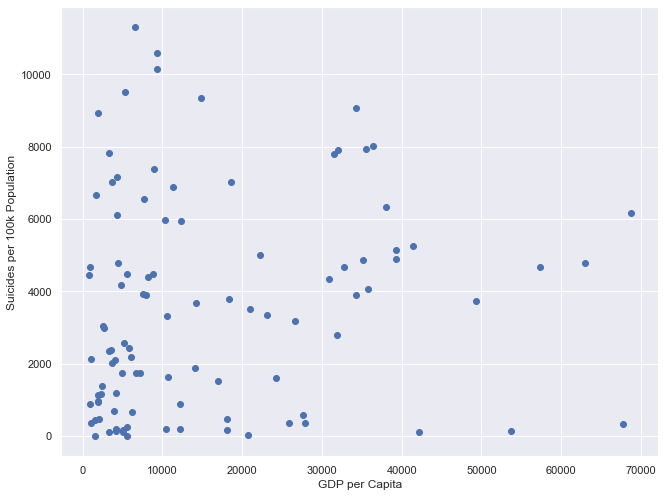

In [35]:
plt.scatter(x = country_mean['gdp_per_capita ($)'], y = country_mean['suicides/100k pop'])
plt.xlabel('GDP per Capita')
plt.ylabel('Suicides per 100k Population')

#### Seems like countries with higher GDP has a lower suicide committing population

In [54]:
generation_grsum = df.groupby('generation').sum().reset_index()
generation_grsum = generation_grsum.drop()

ValueError: No axis named Silent for object type DataFrame

<AxesSubplot:xlabel='generation', ylabel='suicides_no'>

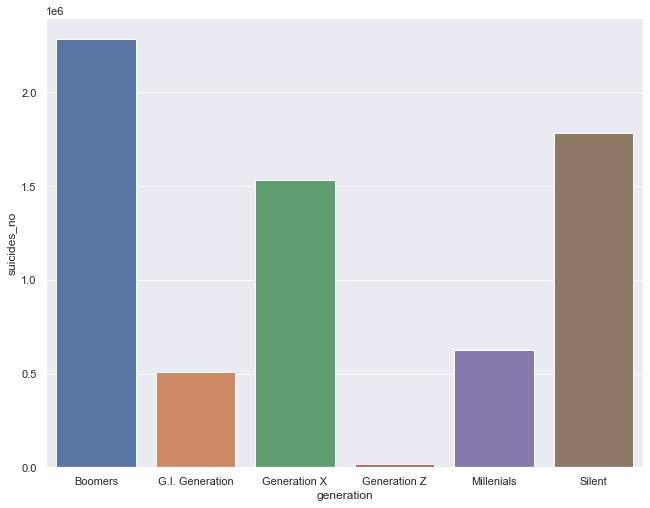

In [52]:
sns.barplot(data = generation_grsum, x = 'generation', y = 'suicides_no')

In [56]:
generation_grsum['generation']

0            Boomers
1    G.I. Generation
2       Generation X
3       Generation Z
4         Millenials
5             Silent
Name: generation, dtype: object